<a href="https://colab.research.google.com/github/Desmondonam/AWS-EC2-S3-and-DynamoDB-application/blob/main/Machine_fifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is a machine Learning model that we are to use in the analysis of data and to ensire that there is a model created for the analysis of FIFA World cup at Qatar.

### Data
The data we are to use in this noteook and the project is a Kaggle data.Here is the link to the dataset.

In [ ]:
### import the modules
import pandas as pd
import numpy as np
import os
import re


## Data Preparation

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"

In [ ]:
wcm = pd.read_csv('/content/2022_world_cup_matches.csv')
im = pd.read_csv('/content/international_matches.csv')
wc = pd.read_csv('/content/world_cups.csv')

In [ ]:
wcm.head()

,ID,Year,Date,Stage,Home Team,Away Team,Host Team
0,1,2022,2022/11/20,Group stage,Qatar,Ecuador,True
1,2,2022,2022/11/21,Group stage,Senegal,Netherlands,False
2,3,2022,2022/11/21,Group stage,England,Iran,False
3,4,2022,2022/11/21,Group stage,United States,Wales,False
4,5,2022,2022/11/22,Group stage,France,Australia,False


In [ ]:
im.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
wc

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70.0,16,17
2,1938,France,Italy,Hungary,Brazil,Sweden,84.0,15,18
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88.0,13,22
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140.0,16,26
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126.0,16,35
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89.0,16,32
7,1966,England,England,Germany FR,Portugal,Soviet Union,89.0,16,32
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95.0,16,32
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97.0,16,38


In [ ]:
wcm.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
im.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
wc.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)

<Axes: xlabel='year', ylabel='winner'>

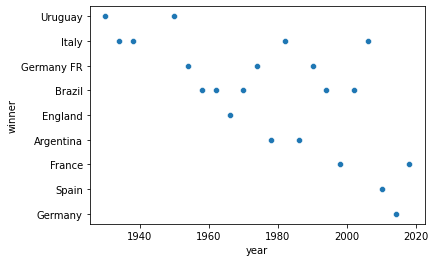

In [ ]:
sns.scatterplot(data=wc, x='year', y='winner')

<Axes: xlabel='year', ylabel='runners-up'>

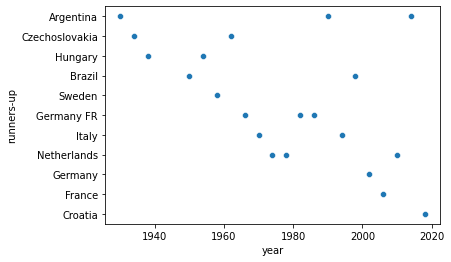

In [ ]:
sns.scatterplot(data=wc, x='year', y='runners-up')

<Axes: xlabel='year', ylabel='third'>

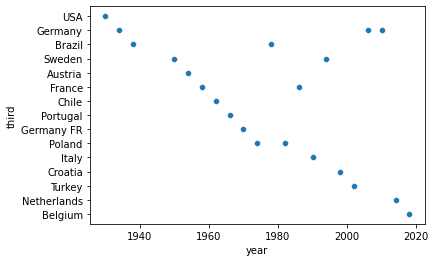

In [ ]:
sns.scatterplot(data=wc, x='year', y='third')

<Axes: xlabel='year', ylabel='fourth'>

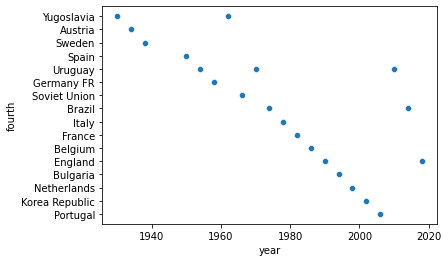

In [ ]:
sns.scatterplot(data=wc, x='year', y='fourth')

In [ ]:
def performance(group):
    # Create empty dataframe
    df = pd.DataFrame()

    # Loop through each country in group
    for country in group:

        # Return a list of rows where the country has participated in the match
        games_im = len(im[(im.winning_team == country) | (im.losing_team == country)])

        # If no games were played by that country, then set inputs as zero
        if games_im == 0:
            wins_im = 0
            losses_im = 0
            winrate_im = 0

        # Otherwise, perform the necessary computations
        else:
            wins_im = len(im[im.winning_team == country])
            losses_im = len(im[im.losing_team == country])
            winrate_im = round(wins_im/games_im, 4)

        # Same logic applies C:
        games_wcm = len(wcm[(wcm.winning_team == country) | (wcm.losing_team == country)])
        if games_wcm == 0:
            wins_wcm = 0
            losses_wcm = 0
            winrate_wcm = 0
        else:
            wins_wcm = len(wcm[wcm.winning_team == country])
            losses_wcm = len(wcm[wcm.losing_team == country])
            winrate_wcm = round(wins_wcm/games_wcm, 4)

        # Computing the total win rate
        winrate = (winrate_im * 0.30) + (winrate_wcm * 0.70)

        # Store all the inputs in a list
        list = [country,
                wins_im, losses_im, games_im, winrate_im,
                wins_wcm, losses_wcm, games_wcm, winrate_wcm, winrate]

        # Append/add the list to the DataFrame
        df = df.append(pd.DataFrame([list],
                                    columns = ['country',
                                               'wins_im', 'losses_im', 'games_im', 'winrate_im',
                                               'wins_wcm', 'losses_wcm', 'games_wcm', 'winrate_wcm', 'winrate'],
                                   ))

    # Sort DataFrame by order of highest winrate
    return df.sort_values(by = 'winrate', ascending = False)



In [ ]:

group_A = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands']
group_B = ['England', 'Iran', 'United States', 'Wales']
group_C = ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland']
group_D = ['France', 'Australia', 'Denmark', 'Tunisia']
group_E = ['Spain', 'Costa Rica', 'Germany', 'Japan']
group_F = ['Belgium', 'Canada', 'Morocco', 'Croatia']
group_G = ['Brazil', 'Serbia', 'Switzerland', 'Cameroon']
group_H = ['Portugal', 'Ghana', 'Uruguay', 'South Korea']

In [ ]:
## Load the data
df =  pd.read_csv("/content/international_matches.csv")

In [ ]:
df.head(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1993-08-08,Peru,Colombia,South America,South America,70,19,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1993-08-08,Zimbabwe,Eswatini,Africa,Africa,50,102,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1993-08-09,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,4,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1993-08-11,Faroe Islands,Norway,Europe,Europe,111,9,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df["date"] = pd.to_datetime(df["date"])

In [ ]:
df.isna().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
## Data types of teh data that we are having
df.dtypes

date                             datetime64[ns]
home_team                                object
away_team                                object
home_team_continent                      object
away_team_continent                      object
home_team_fifa_rank                       int64
away_team_fifa_rank                       int64
home_team_total_fifa_points               int64
away_team_total_fifa_points               int64
home_team_score                           int64
away_team_score                           int64
tournament                               object
city                                     object
country                                  object
neutral_location                           bool
shoot_out                                object
home_team_result                         object
home_team_goalkeeper_score              float64
away_team_goalkeeper_score              float64
home_team_mean_defense_score            float64
home_team_mean_offense_score            

In [ ]:
## analysze the games that were played at preparation and clasify them
df.sort_values("date").tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23906,2022-06-14,England,Hungary,Europe,Europe,5,40,1761,1466,0,...,No,Lose,83.0,85.0,85.0,88.0,84.0,75.5,72.7,73.0
23903,2022-06-14,Jamaica,Mexico,North America,North America,64,9,1378,1658,1,...,No,Draw,76.0,80.0,71.8,78.3,69.0,76.8,82.7,78.2
23890,2022-06-14,Costa Rica,New Zealand,North America,Oceania,31,101,1503,1206,1,...,No,Win,88.0,68.0,71.5,70.3,69.2,70.2,70.7,69.2
23907,2022-06-14,Germany,Italy,Europe,Europe,12,6,1650,1723,5,...,No,Win,90.0,89.0,84.0,82.7,87.8,84.2,85.3,84.5
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2


Since the last world cup was played in 2018, we are to use this 2018data so that we can make some predictions with it. This will help to know what will happen in 2022.

In [ ]:
df = df[(df["date"] >= "2018-8-1")].reset_index(drop=True)

In [ ]:
df.sort_values("date").tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
1091,2022-06-14,England,Hungary,Europe,Europe,5,40,1761,1466,0,...,No,Lose,83.0,85.0,85.0,88.0,84.0,75.5,72.7,73.0
1089,2022-06-14,Costa Rica,New Zealand,North America,Oceania,31,101,1503,1206,1,...,No,Win,88.0,68.0,71.5,70.3,69.2,70.2,70.7,69.2
1097,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
1092,2022-06-14,Germany,Italy,Europe,Europe,12,6,1650,1723,5,...,No,Win,90.0,89.0,84.0,82.7,87.8,84.2,85.3,84.5
1098,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2


In [ ]:
df.home_team.value_counts()

Brazil                  30
England                 29
USA                     29
Italy                   25
Argentina               25
                        ..
Guinea                   2
Cabo Verde               2
United Arab Emirates     2
Honduras                 1
Congo                    1
Name: home_team, Length: 79, dtype: int64

In [ ]:
df["rank_dif"] = df["rank_home"] - df["rank_away"]
df["sg"] = df["home_score"] - df["away_score"]
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

KeyError: ignored

In [ ]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [ ]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [ ]:

team_stats = home_team.append(away_team)#.sort_values("date")

In [ ]:
team_stats_raw = team_stats.copy()

In [ ]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)

    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()

    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()

    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()

    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1]
    else:
        points = 0
        points_l5 = 0

    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()

    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()

    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

In [ ]:
stats_cols = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

stats_df = pd.DataFrame(stats_val, columns=stats_cols)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [ ]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [ ]:
home_team_stats.columns[-12:]

In [ ]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [ ]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [ ]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [ ]:
full_df.columns

In [ ]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x))

In [ ]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

base_df.tail()

In [ ]:
base_df.isna().sum()

In [ ]:
base_df_no_fg = base_df.dropna()

Data Analysis

In [ ]:
data_full_y.value_counts().plot.pie(subplots=True, figsize=(5, 5),shadow=True,startangle=90,autopct='%1.1f%%')

In [ ]:
data_y['result'].value_counts()